# Introduction to NetworkX
---

We will use the Python library [NetworkX](https://networkx.github.io/index.html). It is well documented and several [examples](https://networkx.github.io/documentation/networkx-2.0/auto_examples/index.html) are available.

It is not the only Python library available for network analysis. Another very good one is [graph-tool](https://graph-tool.skewed.de/).
Also the [SNAP library](http://snap.stanford.edu/data/index.html) provides an excellent tool to analyze very large networks.


## NetworkX preliminaries

In [2]:
import networkx as nx

from operator import itemgetter

import math

We import the plotting library seaborn which integrates very well with matplotlib.
More documentation is available here: https://seaborn.pydata.org/

In [3]:
import seaborn as sns

In [4]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


---
Generate an empty UNDIRECTED graph with NetworkX

In [4]:
G=nx.Graph()

Add nodes from a list of names

In [5]:
G.add_nodes_from(['Luca','Andrea','Sara','Carlo','Veronica'])

In [6]:
G.nodes()

NodeView(('Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica'))

Add another node

In [7]:
G.add_node('Giovanni')

print("The nodes of G are: ", G.nodes())

The nodes of G are:  ['Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni']


So far we have nodes in the networks but no edges.
Let's add edges from a list of tuples.

In [8]:
G.add_edges_from([('Luca','Sara'),('Andrea','Luca'),
('Carlo','Veronica'),('Sara','Veronica'),('Giovanni','Andrea')])

We add another edge and 'Lucia' is a new node.

In [9]:
G.add_edge('Veronica','Lucia')

print("The nodes of G are : ", G.nodes())
print('---')
print("The links of G are : ", G.edges())


The nodes of G are :  ['Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni', 'Lucia']
---
The links of G are :  [('Luca', 'Sara'), ('Luca', 'Andrea'), ('Andrea', 'Giovanni'), ('Sara', 'Veronica'), ('Carlo', 'Veronica'), ('Veronica', 'Lucia')]


We want to add the property 'age' to each node. By default, each node is assigned to an empty dictionary to store metadata.

In [10]:
G.nodes['Lucia']

{}

In [11]:
for n in G.nodes():
    if n[0]=='L':
        G.nodes[n]['age']=24
    else:
        G.nodes[n]['age']=28

#show the nodes with their age
print(G.nodes(data=True))

[('Luca', {'age': 24}), ('Andrea', {'age': 28}), ('Sara', {'age': 28}), ('Carlo', {'age': 28}), ('Veronica', {'age': 28}), ('Giovanni', {'age': 28}), ('Lucia', {'age': 24})]


How to remove a node?

In [12]:
G.remove_node('Luca')
print(G.nodes(data=True))
print('---')
print(G.edges())

[('Andrea', {'age': 28}), ('Sara', {'age': 28}), ('Carlo', {'age': 28}), ('Veronica', {'age': 28}), ('Giovanni', {'age': 28}), ('Lucia', {'age': 24})]
---
[('Andrea', 'Giovanni'), ('Sara', 'Veronica'), ('Carlo', 'Veronica'), ('Veronica', 'Lucia')]


If we remove an edge, we do not remove the nodes! 

In [13]:
G.remove_edge('Giovanni', 'Andrea')

In [14]:
print(G.nodes())

['Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni', 'Lucia']


Degree is easily accessible

In [15]:
G.degree('Veronica')

3

In [16]:
G.degree()

DegreeView({'Andrea': 0, 'Sara': 1, 'Carlo': 1, 'Veronica': 3, 'Giovanni': 0, 'Lucia': 1})

In [17]:
for i in G.degree():
    print(i[0], G.degree()[i[0]])

Andrea 0
Sara 1
Carlo 1
Veronica 3
Giovanni 0
Lucia 1


### Analyze the citHepTh network with NetworkX
---
We analyze the citation dataset (citHepTh) available on the [Stanford Large Network Data Colletion](http://snap.stanford.edu/data/index.html). 

Keep in mind that the network is directed!

In [18]:
filepath='./network_data/cit-HepTh.txt'

In [19]:
H=nx.DiGraph()

In [20]:
fh=open(filepath,'r')

#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split()
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        
        H.add_edge(origin,dest)
    
#chiudo il file
fh.close()

In [21]:
print("The network has", len(H), "nodes")

The network has 27770 nodes


In [22]:
print("The network has", len(H.edges()), "edges")

The network has 352807 edges


#### We want to count how many nodes have a given degree-in
The Counter module is a dictionary subclass that allows quick item counting.

In [23]:
indeg=dict(H.in_degree()).values()

In [24]:
from collections import Counter 

degin_distri=Counter(indeg)
print(degin_distri)

Counter({0: 4590, 1: 3787, 2: 2700, 3: 1992, 4: 1643, 5: 1327, 6: 1134, 7: 903, 8: 823, 9: 692, 10: 591, 11: 527, 12: 484, 13: 447, 14: 409, 15: 322, 16: 293, 18: 278, 17: 274, 19: 249, 20: 223, 22: 185, 21: 185, 24: 161, 23: 161, 28: 137, 25: 136, 26: 128, 30: 127, 27: 126, 29: 120, 32: 100, 33: 88, 31: 88, 35: 87, 37: 82, 38: 74, 41: 72, 43: 69, 39: 67, 34: 67, 36: 66, 45: 56, 42: 53, 40: 52, 46: 52, 44: 50, 49: 48, 47: 44, 56: 36, 50: 34, 54: 33, 51: 33, 52: 32, 53: 31, 59: 29, 57: 29, 48: 29, 55: 28, 62: 28, 58: 27, 64: 26, 60: 25, 61: 25, 68: 24, 79: 24, 63: 23, 65: 23, 67: 23, 70: 22, 71: 21, 66: 21, 69: 19, 75: 19, 76: 18, 73: 17, 94: 17, 77: 15, 82: 15, 89: 14, 85: 14, 87: 13, 74: 13, 81: 12, 84: 11, 95: 10, 88: 10, 96: 10, 72: 10, 97: 10, 106: 10, 92: 9, 80: 9, 102: 9, 101: 9, 113: 9, 99: 9, 118: 8, 114: 8, 107: 8, 105: 8, 78: 8, 83: 8, 109: 8, 91: 7, 86: 7, 100: 7, 90: 6, 148: 6, 104: 6, 124: 6, 142: 6, 144: 6, 136: 6, 133: 6, 172: 6, 116: 6, 108: 6, 93: 6, 115: 5, 126: 5, 11

(1.0, 10000.0, 1e-05, 1.0)

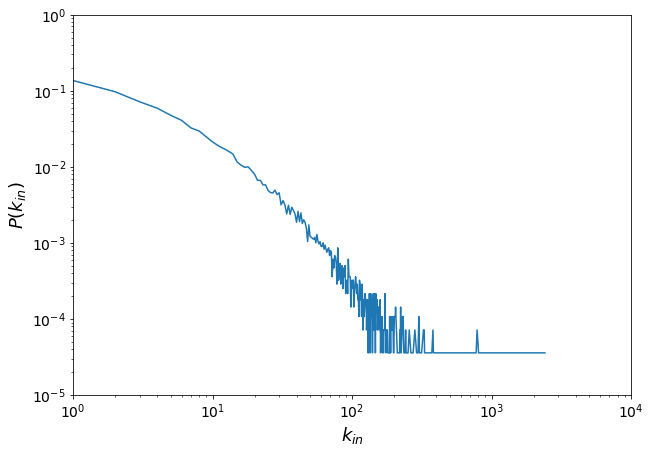

In [29]:
x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(H))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

Let's plot the degree out distribution

In [30]:
outdeg=dict(H.out_degree()).values()
degout_distri=Counter(outdeg)

(1.0, 10000.0, 1e-05, 1.0)

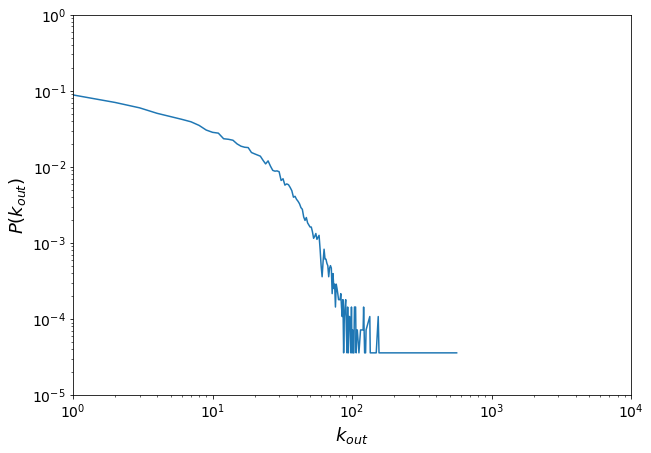

In [31]:
x=[]
y=[]
for i in sorted(degout_distri):   
    x.append(i)
    y.append(float(degout_distri[i])/len(H))

plt.figure(figsize=(10,7))    
plt.plot(np.array(x),np.array(y))

plt.xlabel('$k_{out}$', fontsize=18)
plt.ylabel('$P(k_{out})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

#### Export to gml (be careful this is a large network!)

The file in gml format can be visualized using the software tool Gephi (http://gephi.org).

In [32]:
#nx.write_gml(H,'./../network_data/citHepTh.gml')

## Visualizing a network with NetworkX

NetworkX combined with matplotlib can be used to visualize complex networks. 

It provides a good range of functionalities to obtain some basic and more refined visualization. More details are available in the [documentation](https://networkx.github.io/documentation/stable/reference/drawing.html).

Notice, as stated in the documentation
>NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. 
>In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package.


We generate a random Erdos-Rényi network and visualize it.

In [8]:
N=100
prob=0.08

In [9]:
ER=nx.erdos_renyi_graph(N, prob)

(-1.0340113138420535,
 1.1397873792415198,
 -1.188196367653325,
 0.9805427262564193)

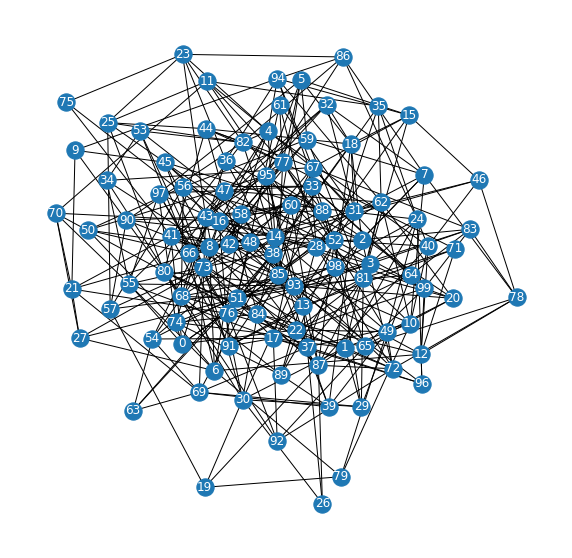

In [10]:
plt.figure(figsize=(10,10))
nx.draw_networkx(ER, font_color ='white')
plt.axis('off')

/Users/Michele/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


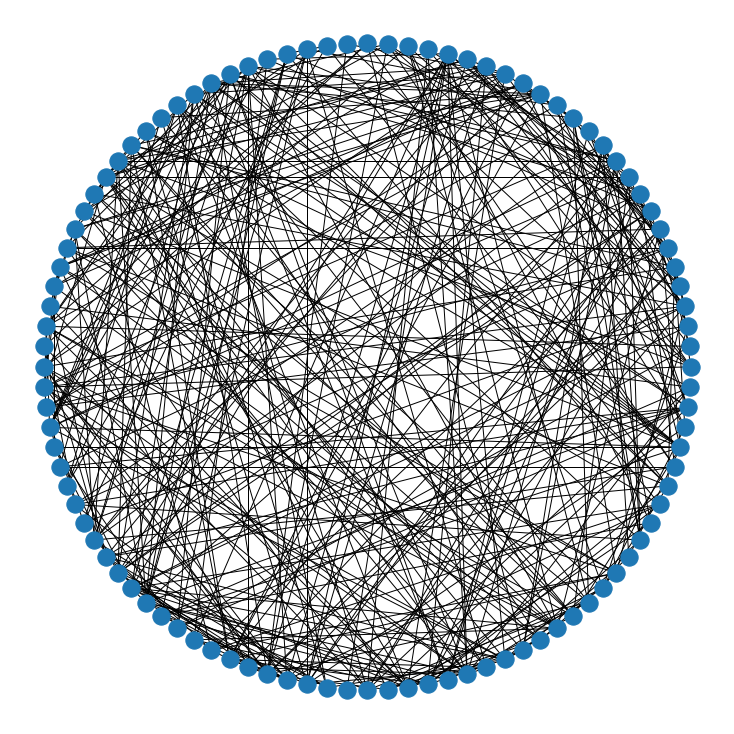

In [38]:
plt.figure(figsize=(10,10))
nx.draw_circular(ER)

/Users/Michele/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


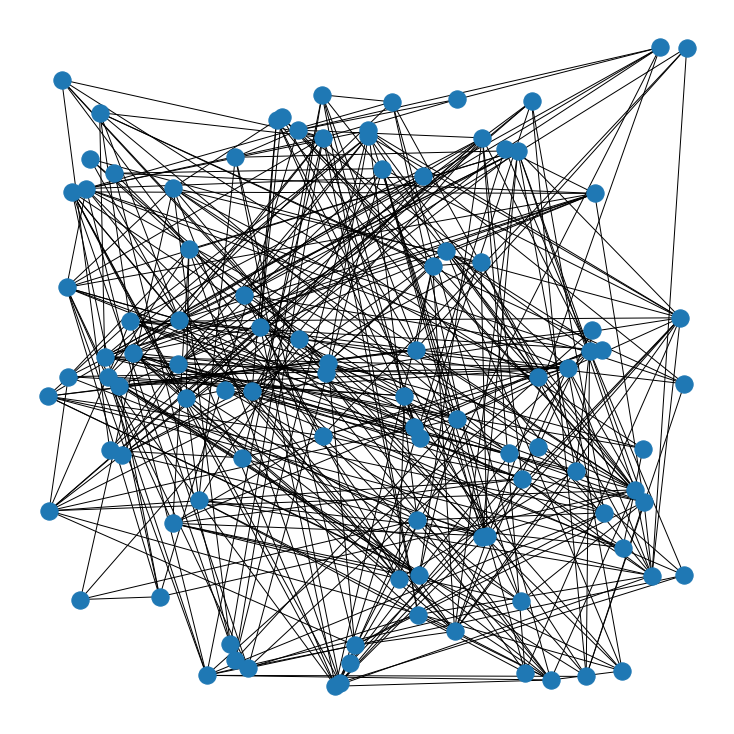

In [39]:
plt.figure(figsize=(10,10))
nx.draw_random(ER)

/Users/Michele/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


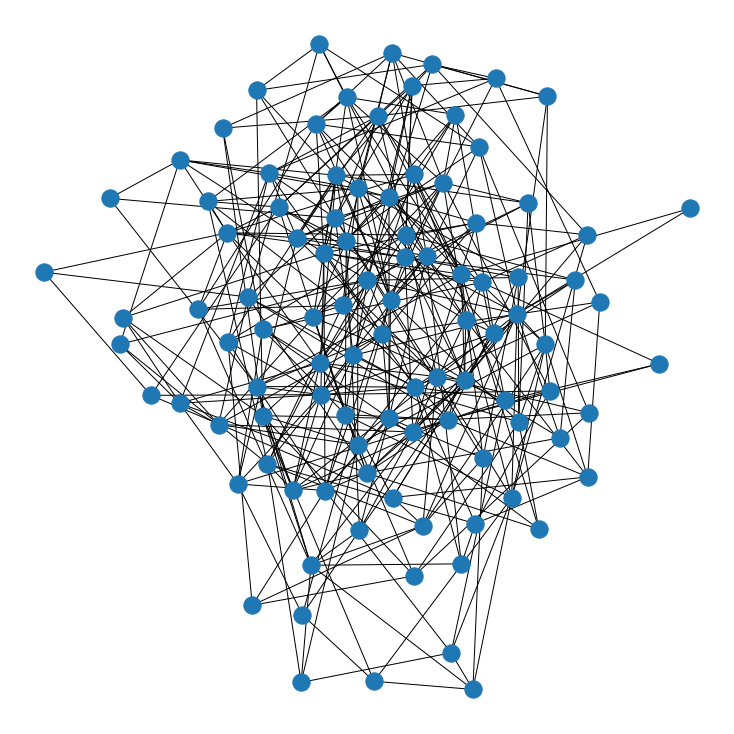

In [40]:
plt.figure(figsize=(10,10))
nx.draw_spring(ER)

In [41]:
pos=nx.spring_layout(ER)
pos

{0: array([-0.35586895,  0.37100536]),
 1: array([-0.73807419,  0.2442224 ]),
 2: array([ 0.18743948, -0.52354262]),
 3: array([ 0.12083755, -0.29566904]),
 4: array([-0.33053194,  0.15841373]),
 5: array([-0.07083   , -0.37833818]),
 6: array([ 0.08900052, -0.41197666]),
 7: array([ 0.1959074 , -0.15837123]),
 8: array([-0.06348377,  0.31605059]),
 9: array([-0.25595859,  0.08616082]),
 10: array([0.06598654, 0.56854944]),
 11: array([0.2181844 , 0.10990653]),
 12: array([ 0.52012317, -0.1687851 ]),
 13: array([-0.15588965, -0.76869646]),
 14: array([-0.00347682,  0.42857409]),
 15: array([-0.03848325,  0.54912745]),
 16: array([-0.42989889, -0.48084612]),
 17: array([-0.18842191, -0.84641495]),
 18: array([-0.16234101,  0.50984356]),
 19: array([-0.23884508, -0.29126009]),
 20: array([-0.32335897,  0.26331037]),
 21: array([ 0.22223539, -0.22685252]),
 22: array([-0.14098168,  0.84021266]),
 23: array([-0.5333254 ,  0.32383041]),
 24: array([-0.54389553,  0.12949113]),
 25: array([-0

We can draw the network nodes only, and assign a specific location to each node.

(-1.0608809320752874,
 1.118461217455089,
 -0.9653222576452914,
 1.0664908495799543)

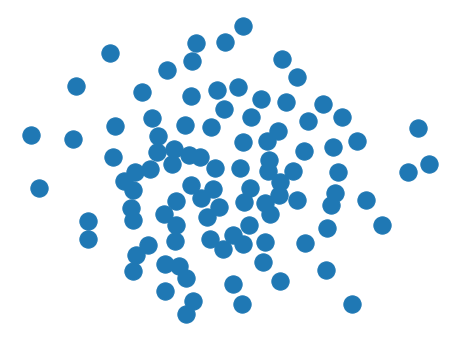

In [42]:
plt.figure(figsize=(8,6))
nx.draw_networkx_nodes(ER, pos)
plt.axis('off')

/Users/Michele/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


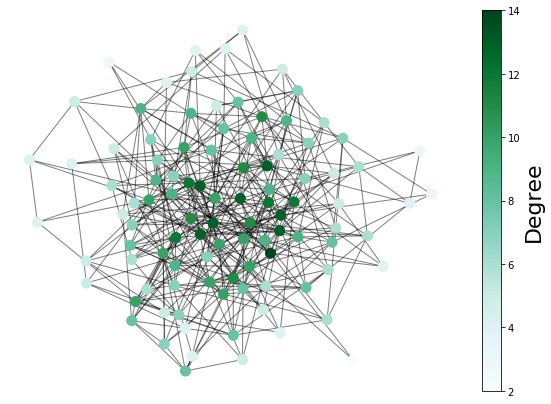

In [45]:
plt.figure(figsize=(10,7))

s=nx.draw_networkx_nodes(ER,
            pos,
            node_size=100.0,
            node_color=list(dict(nx.degree(ER)).values()),
            alpha=1,
            cmap=plt.cm.BuGn
            )

nx.draw_networkx_edges(ER, pos, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)

plt.axis('off')
plt.show()

## Visualizing a spatial network with NetworkX

We analyze the US airport network of year 2010. 
The network is available from the [network repository of Tore Opshal](https://toreopsahl.com/datasets/#usairports).

Weights represent the total number of passengers who traveled on that connection in a year.

Airport coordinates have been added by myself.


In [5]:
airport_path='./network_data/USairport_2010.txt'

In [6]:
meta_path='./network_data/USairport_2010_codes.txt'

In [7]:
G=nx.Graph()

fh=open(airport_path,'r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()    

In [8]:
len(G)

405

Is the network fully connected?

In [9]:
nx.number_connected_components(G)

2

The first connected component in the list is always the largest

In [10]:
c=list(nx.connected_components(G))
c[1]

{1182, 1347}

We define three dictionaries associated to the network to store additional node's features: IATA code, aiport name, geographic coordinates.

In [11]:
G.code={}
G.name={}
G.pos={}

We extract nodes features from a file

In [13]:
finfo=open(meta_path,'r')
finfo.readline()
for line in finfo.readlines():
    s=line.strip().split()
    node=int(s[0])
    G.code[node]=s[1]
    G.name[node]=s[2]
    G.pos[node]=(float(s[4]), float(s[3]))
finfo.close() 

Draw the network

(-127.04962499999999, -65.237875, 23.3436116, 50.0063884)

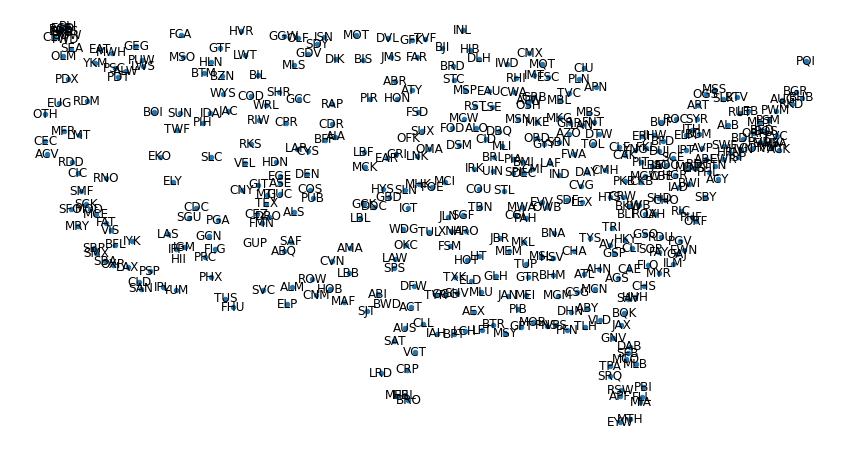

In [19]:
fig=plt.figure(figsize=(15,8))

nx.draw_networkx_nodes(G,
            pos=G.pos,
            node_size=20
            )

#nx.draw_networkx_edges(G,pos=G.pos)

nx.draw_networkx_labels(G, pos=G.pos, labels=G.code)

plt.axis('off')

We would like to draw the edges but there are too many of them.

In [17]:
len(G.edges())

8251

We select only the strongest connections as a subgraph of G by setting a threshold on the annual passengers volume.

In [21]:
weight_threshold=300000

In [22]:
H=nx.Graph()

H.pos={}
H.code={}
H.name={}

fh=open(airport_path,'r')
for line in fh.readlines():
    s=line.strip().split()
    node1=int(s[0])
    node2=int(s[1])
    
    weight=int(s[2])
    
    if weight>weight_threshold:
        H.add_edge(node1,node2)
        
        H.pos[node1]=G.pos[node1]
        H.pos[node2]=G.pos[node2]
        
        H.code[node1]=G.code[node1]
        H.code[node2]=G.code[node2]
        
        H.name[node1]=G.name[node1]
        H.name[node2]=G.name[node2]
        
fh.close()

In [23]:
len(H.edges())

205

We draw the network and color code the nodes by their degree.

(-128.0307916725, -65.1911527775, 23.3436116, 50.0063884)

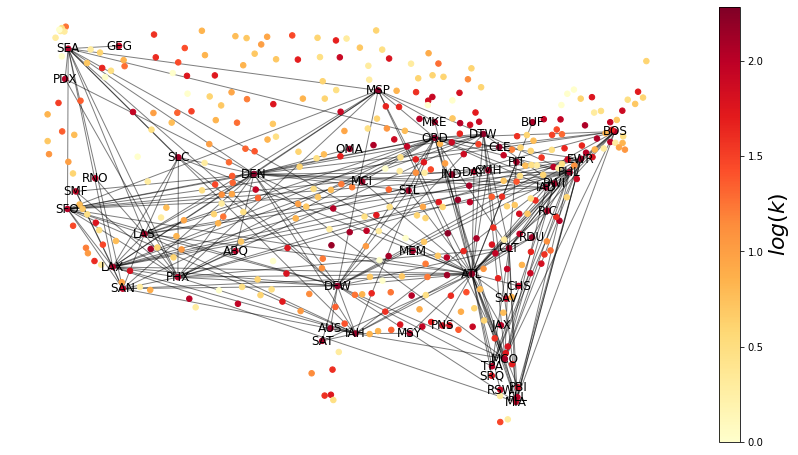

In [24]:
fig=plt.figure(figsize=(15,8))

s=nx.draw_networkx_nodes(G,
            pos=G.pos,
            node_color=[math.log(G.degree(v), 10) for v in G],
            node_size=30,
            cmap=plt.cm.YlOrRd
            )

nx.draw_networkx_edges(H,
            pos=G.pos,
            alpha=0.5
            )

nx.draw_networkx_labels(H,
            pos=H.pos,
            labels=H.code,
            )

cbar=plt.colorbar(s)
cbar.ax.set_ylabel('$log(k)$', size=22)

plt.axis('off')

What is the node with the largest degree?

In [25]:
max(dict(G.degree()).items(), key=itemgetter(1))

(389, 192)

In [26]:
G.name[389]

'Denver'